# Data Exploration

In this notebook I do some data exploration over the Last FM dataset with particular regard to the artists section. In addition I explore the Last FM API for retriving new data if needed.

In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import os.path
import networkx as nx

%matplotlib inline

In [2]:
# Define paths of the files
data_folder = os.path.join('.','data')
artists_path = os.path.join(data_folder,'artists.dat')
ratings_path = os.path.join(data_folder,'user_artists.dat')
tags_path = os.path.join(data_folder,'tags.dat')
tags_assign_path = os.path.join(data_folder,'user_taggedartists-timestamps.dat')

artists = pd.read_csv(artists_path, sep='\t', header=0, index_col=0, skipinitialspace=True)
ratings = pd.read_csv(ratings_path, sep='\t', header=0, skipinitialspace=True)
tags = pd.read_csv(tags_path, sep='\t', header=0, index_col=0, skipinitialspace=True, encoding='latin1')
tags_assign = pd.read_csv(tags_assign_path, sep='\t', header=0, skipinitialspace=True)

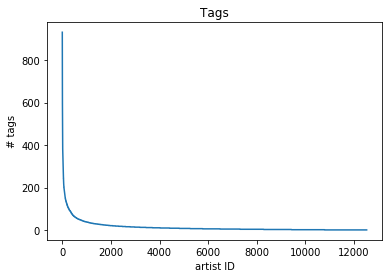

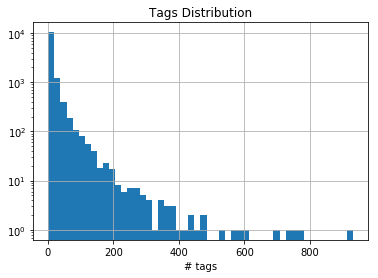

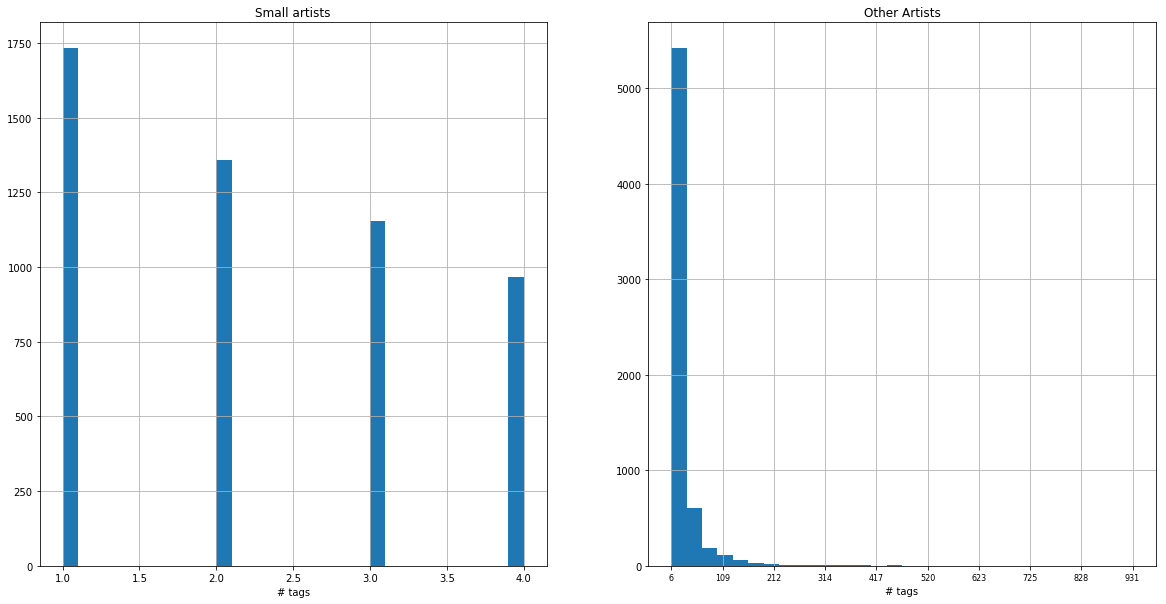

In [18]:
group = tags_assign[['artistID','tagID']].groupby(['artistID'])

group = group.size()
group.sort_values(ascending=False,inplace=True)
small = group.loc[group<5]
big = group.loc[group>5]

group.plot(use_index=False);
plt.title('Tags');
plt.xlabel('artist ID');
plt.ylabel('# tags');

# Tags distribution
ax = plt.figure().gca();
group.hist(ax=ax, bins=50, log=True);
ax.set_xlabel('# tags');
ax.set_title('Tags Distribution');

_, [ax1,ax2] = plt.subplots(1, 2, figsize=(20,10));
small.hist(ax=ax1, bins=30);
ax1.set_xlabel('# tags');
ax1.set_title('Small artists');
big.hist(ax=ax2, bins=30, xlabelsize=8);
ax2.set_xticks(np.round(np.linspace(min(big),max(big),10)))
ax2.set_xlabel('# tags');
ax2.set_title('Other Artists');

Text(0,0.5,'# tags')

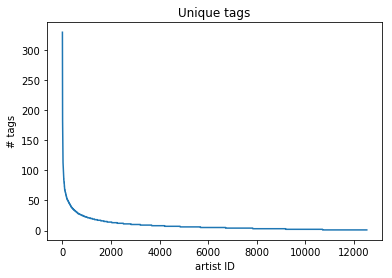

In [4]:
group = tags_assign[['artistID','tagID']].groupby(['artistID'])
group = group.nunique().tagID.sort_values(ascending=False)
group.plot(use_index=False);
plt.title('Unique tags');
plt.xlabel('artist ID');
plt.ylabel('# tags')